In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
# import scraped NBA stats from Excel file

xls = pd.ExcelFile('nba_draft.xlsx')

map = {}
for sheet_name in xls.sheet_names:
    map[sheet_name] = xls.parse(sheet_name)
    

In [3]:
new_frame = pd.DataFrame(columns=map['draft_data_2019'].columns)

# looping through each dataframe item in map, and only acquiring the rows for players who play Small Forward
for key, value in map.items():
    test = value
    test.reset_index(drop=True,inplace=True)
    test.index = test.index + 1
    test.Pk = test.index
    # drop any rows that are missing data
    test = test.dropna()
    if test.empty is False:
        new_frame = new_frame.append(test)

positions = new_frame['position'].unique()

# collect all college stats and rankings
new_frame = new_frame[['Pk', 'college_G', 'college_MP', 'college_FG', 'college_FGA',
       'college_3P', 'college_3PA', 'college_FT', 'college_FTA', 'college_ORB',
       'college_TRB', 'college_AST', 'college_STL', 'college_BLK',
       'college_TOV', 'college_PF', 'college_PTS', 'college_FG%',
       'college_3P%', 'college_FT%', 'college_MP.1', 'college_PTS%',
       'college_TRB.1', 'college_AST.1','position']]

# make sure all column datatypes are numerical
for column in new_frame:
    if column != 'position':
        new_frame[column] = pd.to_numeric(new_frame[column])

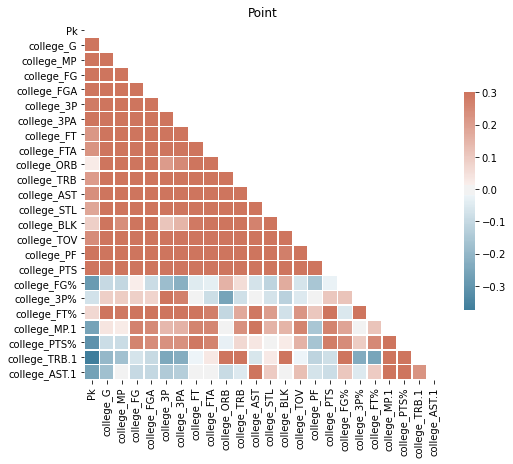

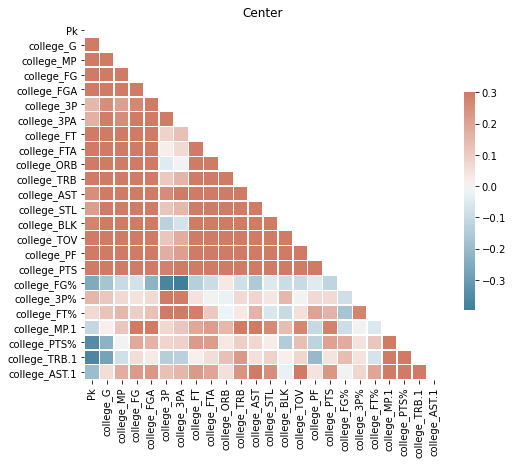

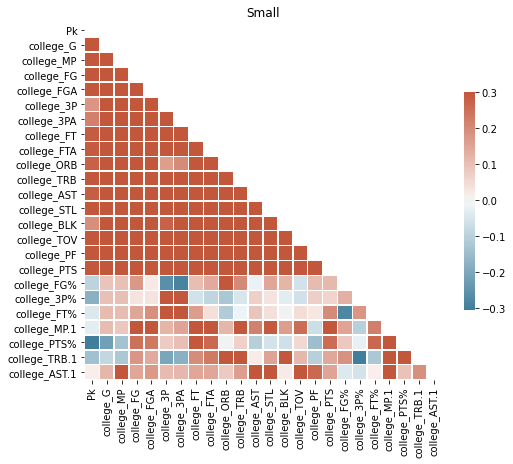

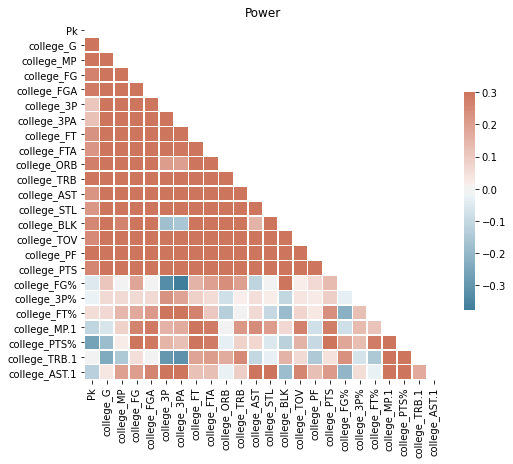

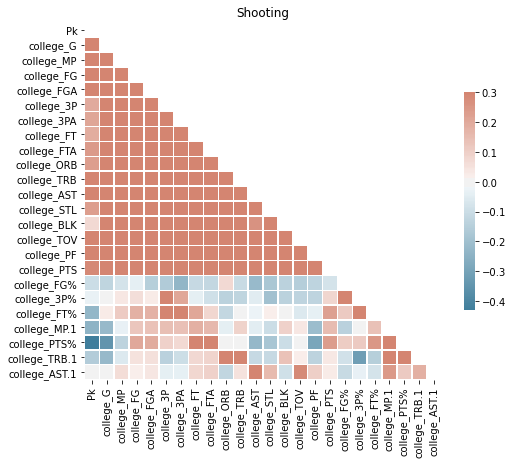

In [15]:

# loop through each position type and output correlation matrix of Pk vs college stats
for each in positions:
    subset = new_frame.loc[new_frame['position']==each]

    # compute the correlation matrix
    corr = subset.corr()

    # generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # set up the matplotlib figure
    f, ax = plt.subplots(figsize=(8,8))

    # format diverging colour palette for correlation matrix
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    ax.set_title(each)
    # draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})